- Nama: Muhammad Ilham Pradipta
- Email: ilhampradipta68@gmail.com
- Id Dicoding:mihamp12

In [1]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [2]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip


Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM

In [3]:
import os

base_dir = 'rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

class_names = ['rock', 'paper', 'scissors']
for class_name in class_names:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, class_name), exist_ok=True)

# Membaca daftar file gambar
file_paths = []
labels = []

for class_name in class_names:
    class_path = os.path.join(base_dir, class_name)
    for filename in os.listdir(class_path):
        file_path = os.path.join(class_path, filename)
        file_paths.append(file_path)
        labels.append(class_name)

# Memisahkan dataset menjadi training dan validation set
train_files, val_files, train_labels, val_labels = train_test_split(file_paths, labels, test_size=0.4, random_state=42)

# Memindahkan file ke direktori training
for file, label in zip(train_files, train_labels):
    destination = os.path.join(train_dir, label, os.path.basename(file))
    os.replace(file, destination)

# Memindahkan file ke direktori validation
for file, label in zip(val_files, val_labels):
    destination = os.path.join(validation_dir, label, os.path.basename(file))
    os.replace(file, destination)

In [5]:
image_generator = ImageDataGenerator(rescale=1./255)

In [25]:
train_data_gen = image_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Menggunakan image data generator untuk validation set
val_data_gen = image_generator.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer for regularization
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [9]:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)


In [10]:
history = model.fit(
    train_data_gen,
    epochs=10,
    validation_data=val_data_gen
)

Epoch 1/10
41/41 [==============================] - 101s 2s/step - loss: 1.1473 - accuracy: 0.5534 - val_loss: 0.6258 - val_accuracy: 0.7911
Epoch 2/10
41/41 [==============================] - 89s 2s/step - loss: 0.4502 - accuracy: 0.8323 - val_loss: 0.3278 - val_accuracy: 0.8870
Epoch 3/10
41/41 [==============================] - 95s 2s/step - loss: 0.2180 - accuracy: 0.9192 - val_loss: 0.1563 - val_accuracy: 0.9304
Epoch 4/10
41/41 [==============================] - 95s 2s/step - loss: 0.1524 - accuracy: 0.9489 - val_loss: 0.1293 - val_accuracy: 0.9498
Epoch 5/10
41/41 [==============================] - 94s 2s/step - loss: 0.0804 - accuracy: 0.9703 - val_loss: 0.1766 - val_accuracy: 0.9452
Epoch 6/10
41/41 [==============================] - 90s 2s/step - loss: 0.0507 - accuracy: 0.9832 - val_loss: 0.1620 - val_accuracy: 0.9555
Epoch 7/10
41/41 [==============================] - 95s 2s/step - loss: 0.0586 - accuracy: 0.9817 - val_loss: 0.1539 - val_accuracy: 0.9532
Epoch 8/10
41/41 [=

Saving G6trRFSUGIeaQorS.png to G6trRFSUGIeaQorS.png
1/1 [==============================] - 0s 44ms/step


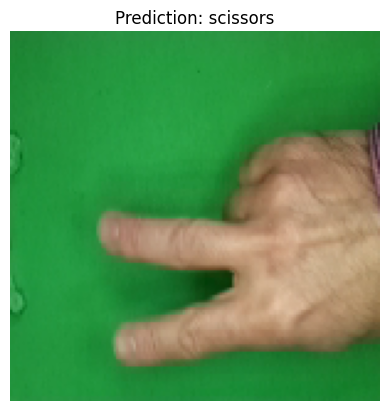

In [21]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_uploaded_image(file_path):
    # Membaca dan memproses gambar
    img = image.load_img(file_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalisasi

    # Melakukan prediksi
    prediction = model.predict(img_array)

    # Menampilkan hasil prediksi
    class_index = np.argmax(prediction)
    predicted_class = class_names[class_index]

    # Menampilkan gambar
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Prediction: {predicted_class}')
    plt.show()

# Mengunggah gambar ke Colab
uploaded = files.upload()

# Mendapatkan path gambar yang diunggah
uploaded_image_path = list(uploaded.keys())[0]

# Memanggil fungsi untuk memprediksi gambar yang diunggah
predict_uploaded_image(uploaded_image_path)